In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
import numpy as np
import pandas as pd

import mplfinance as fplt

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15, 10]

import matplotlib.pyplot as plt
plt.style.use('dark_background')

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d/%m %H:%M')

from finlib.tick_data import read_csv
from finlib.bars import time_bars, tick_bars, volume_bars, dollar_bars

In [4]:
tick_data = read_csv('../data/test/binance_ticks.csv')
tick_data.head()

,trade_id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
time,,,,,,,
2020-01-01 00:00:00.594,222472783,7195.24,0.001500,10.792860,1577836800594,True,True
2020-01-01 00:00:00.862,222472784,7196.25,0.022706,163.398053,1577836800862,False,True
2020-01-01 00:00:00.862,222472785,7196.25,0.099650,717.106312,1577836800862,False,True
2020-01-01 00:00:00.998,222472786,7196.25,0.001543,11.103814,1577836800998,False,True
2020-01-01 00:00:01.503,222472787,7195.25,0.400000,2878.100000,1577836801503,True,True


Are any of the values null?

In [5]:
tick_data.time.isna().any(), tick_data.trade_id.isna().any()

(False, False)

Are the series increasingly monotonic? They should be.

In [6]:
tick_data.time.is_monotonic, tick_data.trade_id.is_monotonic

(True, True)

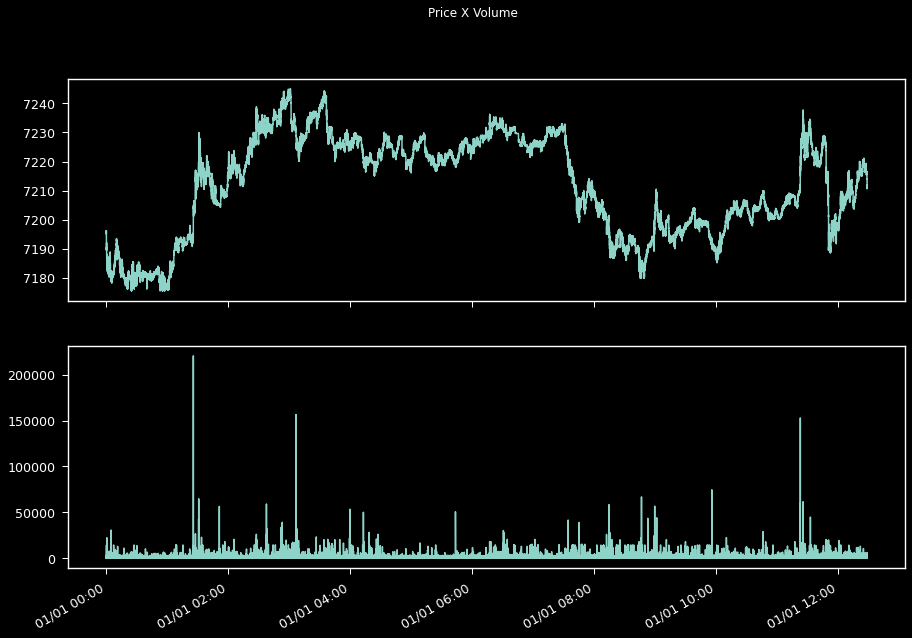

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15, 10))
fig.suptitle('Price X Volume')
ax1.plot(tick_data['price'])
ax2.plot(tick_data['quoteQty'])
plt.gcf().autofmt_xdate()
ax1.xaxis.set_major_formatter(myFmt)
plt.show()

In [8]:
# Hipothesis: when a single tick has a diparate volume with relation to the recent exponential mean, price is about to run. 

In [9]:
# Hipothesis: when there is a run on "is buyer maker", the market will go up.
# Hipothesis: HIGH is buyer maker + LOW price movement = absorption.

In [10]:
time_bars_ = time_bars(tick_data, '3T')

time_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7182.43,7196.25,7180.26,70.572637,507217.387779,0.518072,1.0
1,2020-01-01 00:03:02.814,7183.83,7179.99,7188.94,7178.20,37.399739,268584.112008,0.540909,1.0
2,2020-01-01 00:06:00.448,7180.00,7187.68,7187.74,7179.99,30.886999,221869.132808,0.430595,1.0
3,2020-01-01 00:09:00.351,7187.68,7188.71,7193.53,7186.02,38.880878,279534.959933,0.395735,1.0
4,2020-01-01 00:12:00.386,7189.52,7180.97,7189.52,7180.24,25.202615,181039.307107,0.570025,1.0
...,...,...,...,...,...,...,...,...,...
245,2020-01-01 12:15:00.639,7205.08,7210.62,7211.72,7203.62,23.137066,166757.539923,0.310096,1.0
246,2020-01-01 12:18:01.563,7210.62,7219.05,7220.00,7210.62,38.473000,277569.070678,0.440000,1.0
247,2020-01-01 12:21:00.420,7219.71,7219.10,7219.99,7215.00,30.988650,223638.621048,0.583333,1.0
248,2020-01-01 12:24:01.310,7218.47,7217.94,7221.14,7216.44,33.884035,244607.973024,0.466334,1.0


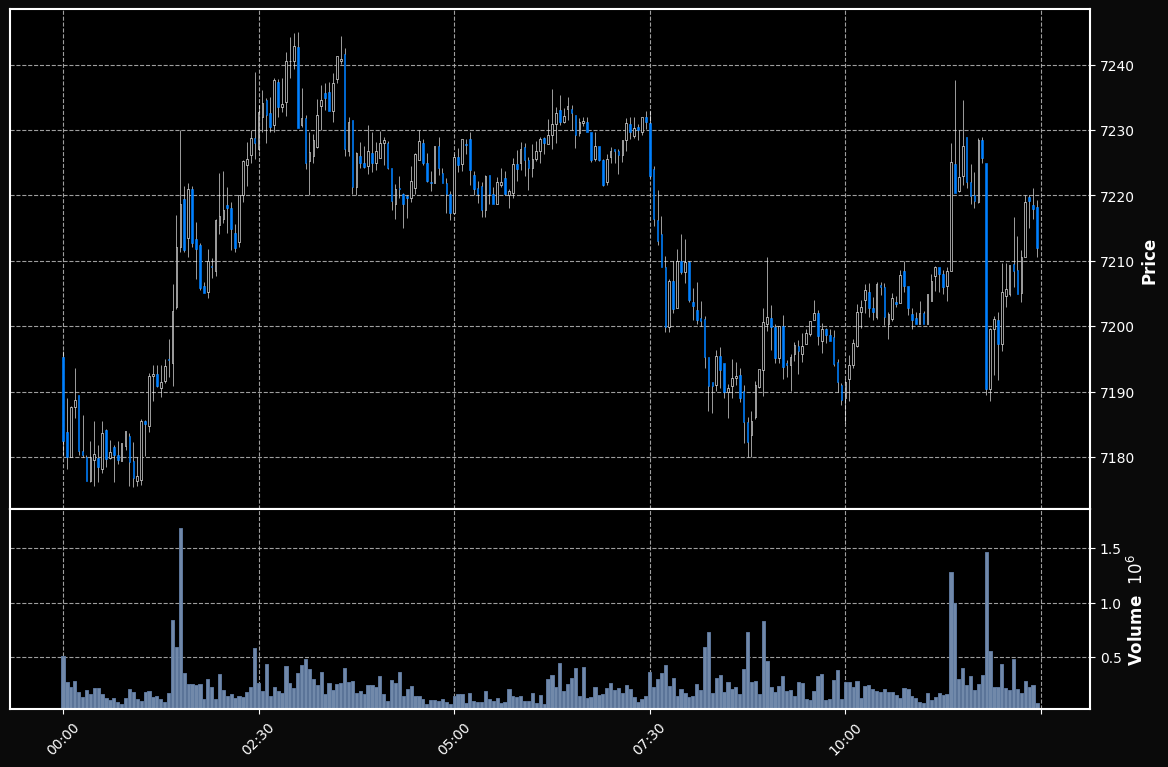

In [11]:
fplt.plot(
    time_bars_.fillna(method='ffill').set_index('time').rename(columns={'volume_dollars': 'volume'}), 
    figsize=(15, 10),
    style='mike',
    type='candle',
    volume=True,
    warn_too_much_data=len(time_bars_)
)

In [12]:
tick_bars_ = tick_bars(tick_data, n=100)

tick_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7196.23,7196.25,7195.24,0.620067,4461.753740,0.117647,1.0
1,2020-01-01 00:00:01.671,7196.23,7190.30,7196.24,7190.30,8.421107,60577.110141,0.570000,1.0
2,2020-01-01 00:00:13.372,7190.33,7188.20,7192.12,7188.18,14.827016,106612.139866,0.500000,1.0
3,2020-01-01 00:00:30.379,7188.17,7185.66,7188.45,7184.07,10.722620,77066.404409,0.540000,1.0
4,2020-01-01 00:00:41.552,7185.84,7183.35,7186.55,7183.14,11.037737,79300.726922,0.780000,1.0
...,...,...,...,...,...,...,...,...,...
996,2020-01-01 12:24:34.775,7219.60,7221.00,7221.01,7218.87,7.108329,51324.189399,0.430000,1.0
997,2020-01-01 12:25:07.945,7221.00,7216.60,7221.14,7216.44,8.895480,64219.982753,0.610000,1.0
998,2020-01-01 12:25:59.316,7216.59,7217.79,7219.03,7216.59,10.700106,77231.718751,0.500000,1.0
999,2020-01-01 12:26:55.544,7217.81,7216.38,7219.37,7215.35,5.798217,41849.164658,0.590000,1.0


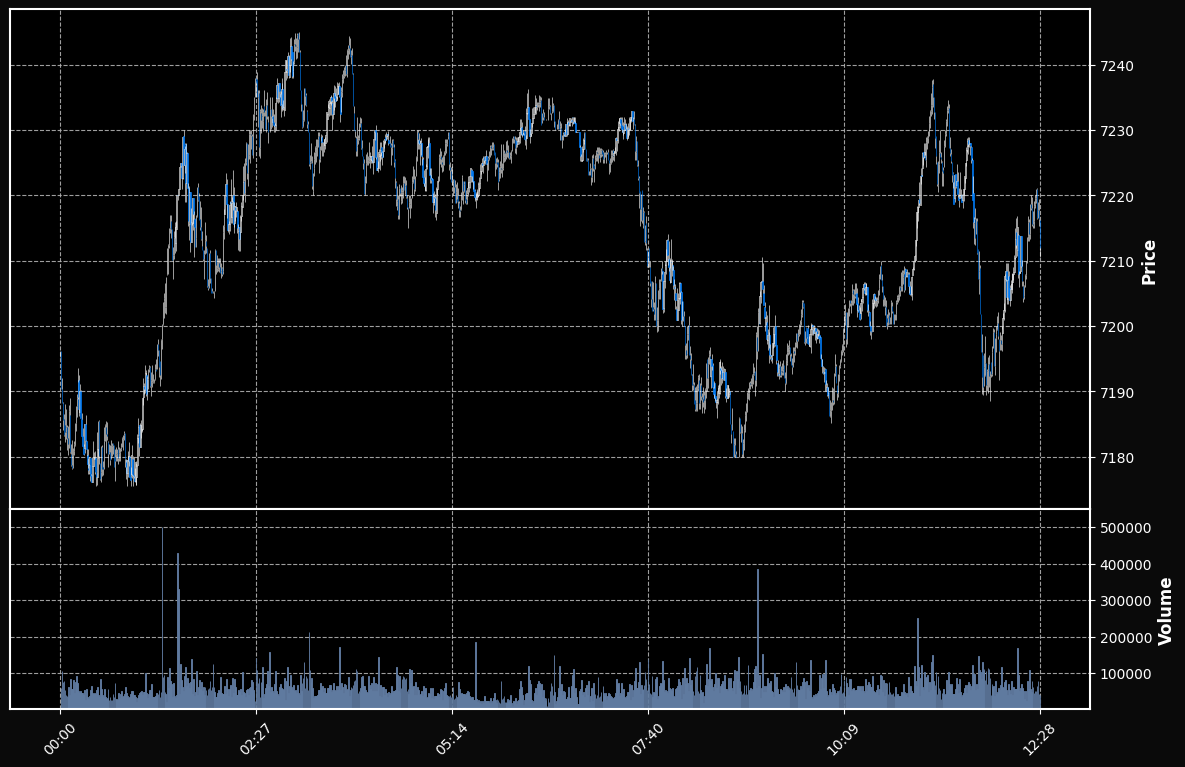

In [13]:
fplt.plot(
    tick_bars_.fillna(method='ffill').set_index('time').rename(columns={'volume_dollars': 'volume'}), 
    figsize=(15, 10),
    style='mike',
    type='candle',
    volume=True,
    warn_too_much_data=len(tick_bars_)
)

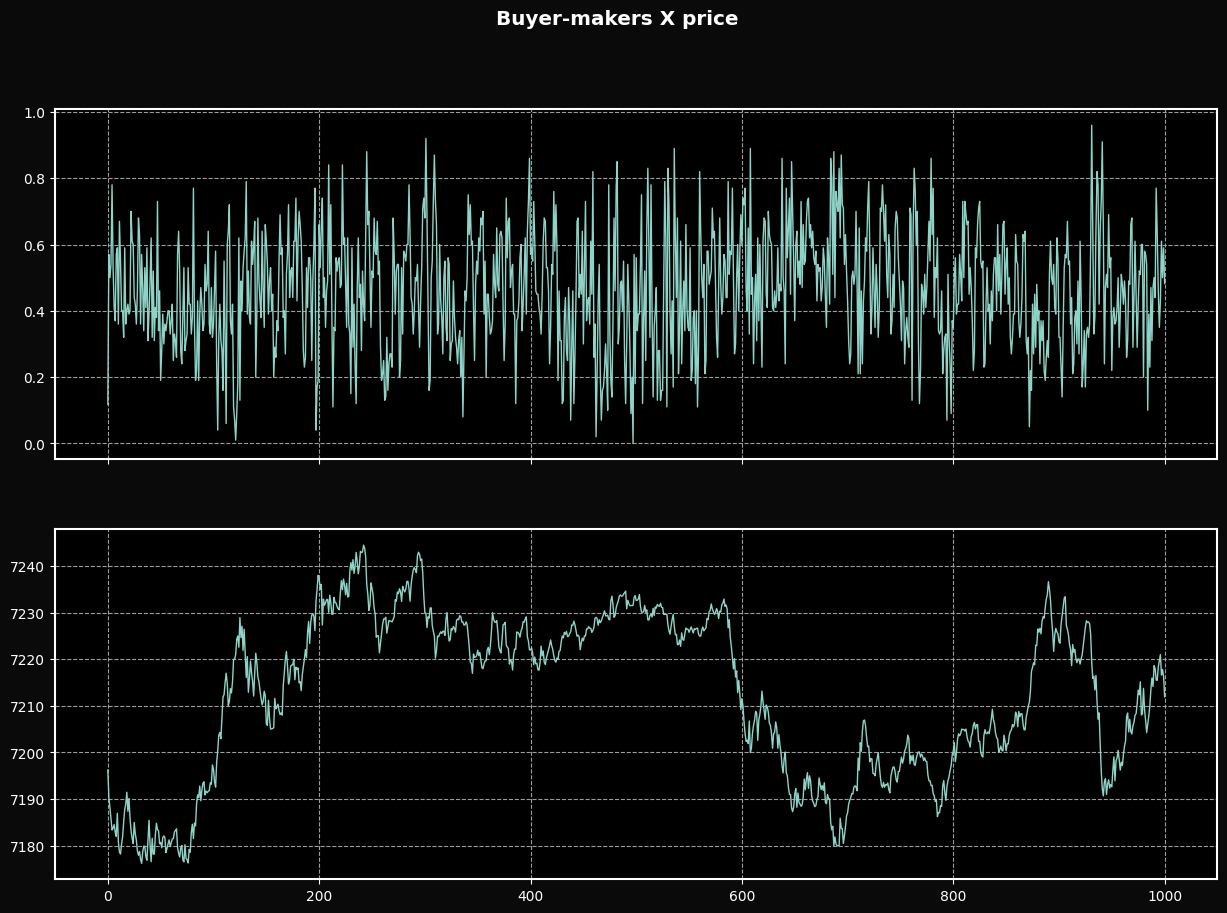

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15, 10))
fig.suptitle('Buyer-makers X price')
ax1.plot(tick_bars_['buyer_maker_pct'])
ax2.plot(tick_bars_['close'])
plt.show()

In [15]:
volume_bars_ = volume_bars(tick_data)
volume_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7190.35,7196.25,7190.30,9.286143,66800.380408,0.512000,1.0
1,2020-01-01 00:00:14.956,7190.33,7190.66,7192.12,7189.39,11.813793,84946.733893,0.463768,1.0
2,2020-01-01 00:00:24.943,7190.65,7187.46,7190.65,7184.07,10.397827,74741.259563,0.606742,1.0
3,2020-01-01 00:00:34.228,7187.45,7183.74,7187.69,7183.74,8.957462,64366.345967,0.669355,1.0
4,2020-01-01 00:00:49.248,7183.73,7184.95,7188.06,7182.20,12.577925,90369.304738,0.539823,1.0
...,...,...,...,...,...,...,...,...,...
804,2020-01-01 12:23:24.178,7216.13,7219.85,7220.00,7215.24,9.899488,71451.631980,0.408696,1.0
805,2020-01-01 12:24:24.742,7219.04,7221.00,7221.01,7218.17,10.314400,74470.861823,0.418301,1.0
806,2020-01-01 12:25:14.409,7221.01,7217.48,7221.14,7216.44,10.355450,74753.098817,0.571429,1.0
807,2020-01-01 12:26:14.534,7217.45,7219.36,7219.37,7216.59,10.195061,73589.109967,0.542056,1.0


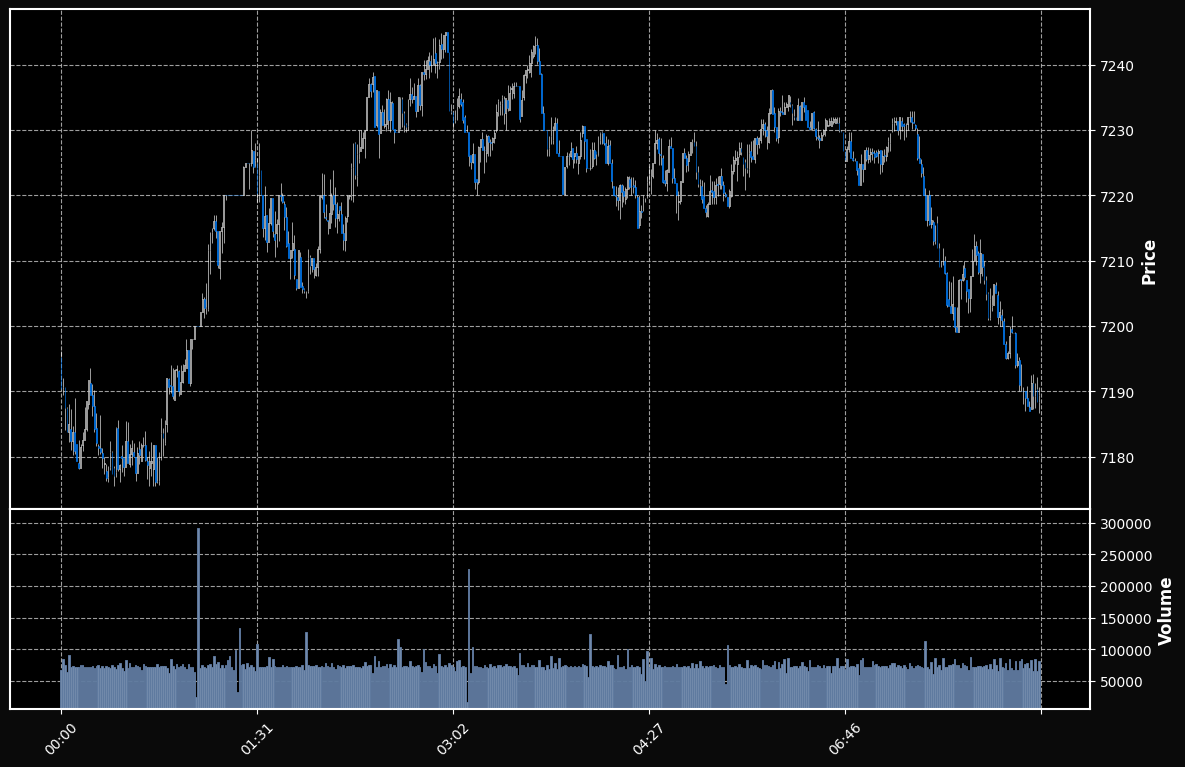

In [16]:
fplt.plot(
    volume_bars_[:500].fillna(method='ffill').set_index('time').rename(columns={'volume_dollars': 'volume'}), 
    figsize=(15, 10),
    style='mike',
    type='candle',
    volume=True
)

In [17]:
dollar_bars_ = dollar_bars(tick_data, dollars=10**5)
dollar_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7190.67,7196.25,7189.72,13.872731,99778.914593,0.550000,1.0
1,2020-01-01 00:00:15.110,7190.64,7186.03,7192.12,7186.03,14.001925,100670.906722,0.489583,1.0
2,2020-01-01 00:00:31.458,7186.00,7183.74,7187.72,7183.74,12.580569,90404.898516,0.637427,1.0
3,2020-01-01 00:00:49.248,7183.73,7185.52,7188.06,7182.20,16.566095,119026.512330,0.487179,1.0
4,2020-01-01 00:01:50.907,7185.54,7182.65,7185.54,7180.26,13.976916,100393.098672,0.445887,1.0
...,...,...,...,...,...,...,...,...,...
583,2020-01-01 12:21:26.179,7218.58,7215.35,7218.85,7215.25,14.022938,101194.244651,0.691589,1.0
584,2020-01-01 12:22:19.305,7215.46,7219.01,7219.17,7215.00,13.745716,99197.085915,0.515625,1.0
585,2020-01-01 12:24:14.796,7219.00,7221.06,7221.14,7218.04,14.594230,105371.164686,0.421053,1.0
586,2020-01-01 12:25:26.461,7221.05,7218.74,7221.05,7216.44,13.692589,98833.361192,0.554140,1.0


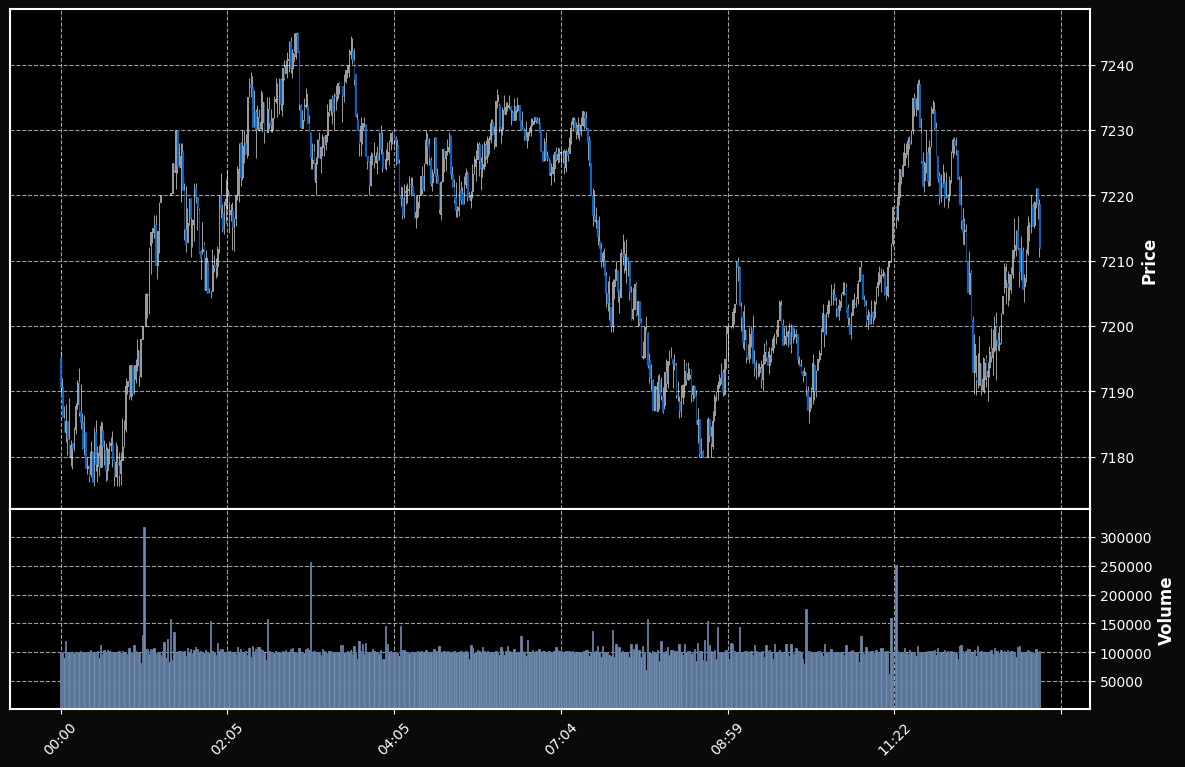

In [18]:
fplt.plot(
    dollar_bars_.fillna(method='ffill').set_index('time').rename(columns={'volume_dollars': 'volume'}), 
    figsize=(15, 10),
    style='mike',
    type='candle',
    volume=True
)

## Tick rule

In this case, we don't need an algorithm to predict wether the trade is buy-initiated or sell-initiated. We have this data on the 'isBuyerMaker' column.

We'll call the sequence generated by the 'tick rule' `tick_side_seq` and its notation will be $b_t$, matching MLDP's notation.

In [19]:
def calc_tick_rule(tick_data_df, trade_side_col='isBuyerMaker'):
    trade_side = tick_data_df[trade_side_col].apply(lambda side: 1 if side else -1)
    return trade_side

tick_side_seq = calc_tick_rule(tick_data)

# Tick Imbalance Bar

Trade side: $b_t$

Bar length: $ T $

Tick (im)balance at time $ T $:

$$ \theta_{T} = \sum _{t=1} ^{T} b_{t} $$

In [20]:
# Example: tick imbalance on the first 1000 ticks.

bar_length = 1000
tick_imb = tick_side_seq[:bar_length].sum()
tick_imb

36

Expected $ \theta_{T} $ at the beginning of the bar:

$$ E_{0}[ \theta_{T} ] = E_{0}[T](P[b_{t} = 1] − P[b_{t} = -1]) $$

Which is the same as

$$ E_{0}[ \theta_{T} ] = E_{0}[T](2 \times P[b_{t} = 1] − 1) $$

In [21]:
buy_prob = (tick_side_seq[:bar_length] == 1).sum() / bar_length
sell_prob = 1 - buy_prob

In [62]:
expected_imbalance = bar_length * (buy_prob - sell_prob)
expected_imbalance = int(expected_imbalance)
expected_imbalance

36

In [92]:
bar_length_history = pd.Series([1000])
buy_prob_history = pd.Series([0.518])

expected_length = bar_length_history.ewm(alpha=0.8).mean()
expected_buy_prob = buy_prob_history.ewm(alpha=0.8).mean()

In [93]:
tick_index = 0
bar_size = 0
_buys_qty = 0
tick_imbalance = 0
tib_index = []

for tick_side in tick_side_seq[1000:]:
    tick_imbalance += tick_side
    
    if tick_side == 1: _buys_qty += 1
    
    if np.abs(tick_imbalance) >= int(expected_length.iloc[-1] * np.abs(2 * expected_buy_prob.iloc[-1] - 1)):
        bar_length_history.append(pd.Series(bar_size + 1))
        buy_prob_history.append(pd.Series(_buys_qty / bar_size))
        tib_index.append(tick_index)
        
        bar_size = 0
        _buys_qty = 0
        tick_imbalance = 0
    
    else:
        bar_size += 1
        tick_index += 1

In [94]:
tib_index = pd.Series([0, 1000] + [index + 1000 for index in tib_index])

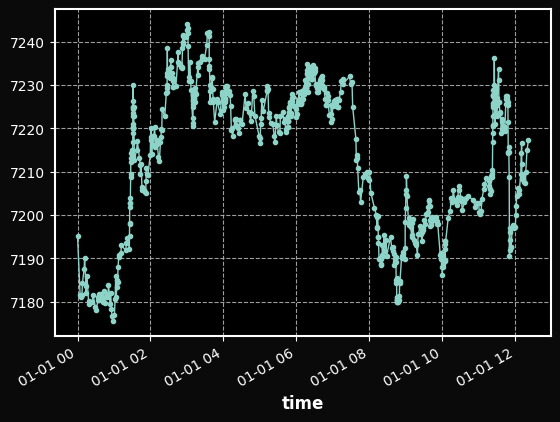

In [95]:
tick_data.price.iloc[tib_index].plot(marker = '.');